# Lab 2.3 - Curve Fitting for errors in the system

## Naszykuwanie paczek i danych 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Tworzymy przykładowe dane
data = pd.DataFrame({
    'miesiac': range(1, 94),
    'liczba_bledow': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 0, 0, 3, 1, 1, 0, 1, 0, 2,
                      10, 0, 16, 0, 2, 2, 1, 1, 1, 0, 3, 2, 1, 6, 3, 0, 1, 1, 0, 0, 14, 1, 4, 1, 1, 7, 14, 6, 0,
                      1, 2, 19, 7, 2, 5, 1, 12, 4, 6, 4, 7, 2, 2, 3, 8, 4, 6, 3, 3, 5, 8, 0, 6, 5, 10, 0, 5, 1, 2, 1, 2,
                      1, 0]
})

# Obliczamy skumulowana sume bledow
data['suma_bledow'] = data['liczba_bledow'].cumsum()

# Podzial na zbior treningowy i testowy
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

## Naszykowanie funkcji dla krzywej wzrostu oraz dopasowanie modelu

In [3]:
def growth_curve(t, k, a, b):
    """
    Funkcja logistyczna modelująca skumulowany wzrost
    t: zmienna czasowa (numer miesiąca)
    k: maksymalna wartość (asymptota)
    a: współczynnik wzrostu
    b: parametr przesunięcia
    """
    return k / (1 + b * np.exp(-a * t))


# Dopasowujemy model do danych treningowych
popt, pcov = curve_fit(growth_curve,
                       train_data['miesiac'],
                       train_data['suma_bledow'],
                       p0=[300, 0.1, 90],
                       bounds=([0, 0, 0], [1000, 1, 1000]))

k, a, b = popt
pcov = np.sqrt(np.diag(pcov))

print(f"k (maksymalna liczba błędów):")
print(f'k: {k:.2f} +/- {pcov[0]:.2f}')
print(f"a (współczynnik wzrostu):")
print(f'a: {a:.6f} +/- {pcov[1]:.6f}')
print(f"b (parametr przesunięcia):")
print(f'b: {b:.2f} +/- {pcov[2]:.2f}')

k (maksymalna liczba błędów):
k: 302.43 +/- 24.73
a (współczynnik wzrostu):
a: 0.069627 +/- 0.003468
b (parametr przesunięcia):
b: 92.03 +/- 8.45


## Wizualizacja dopasowania modelu oraz liczenie bledow 

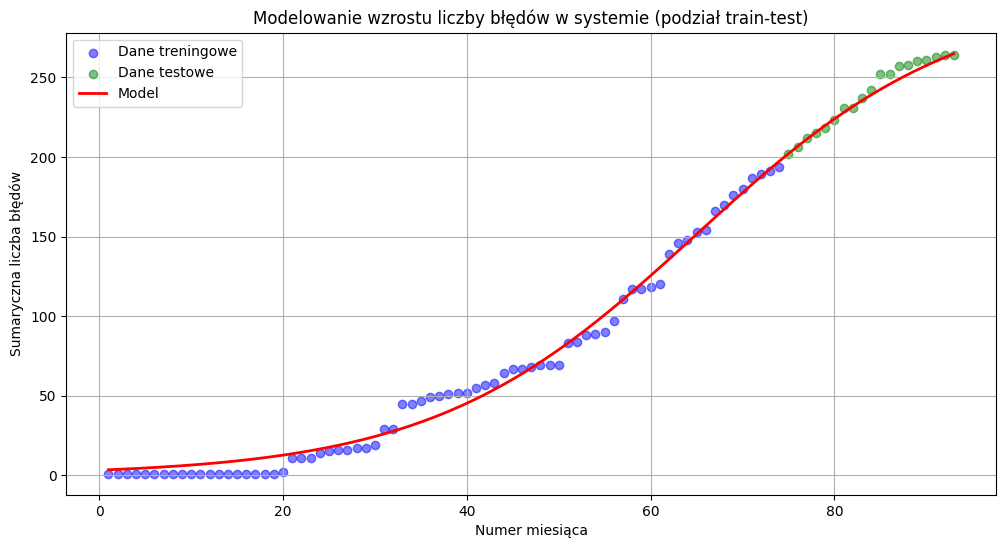

MSE dla danych treningowych: 42.9034
MSE dla danych testowych: 16.6295
R^2 dla danych treningowych: 0.988341
R^2 dla danych testowych: 0.962262


In [16]:
# Tworzymy wykres
plt.figure(figsize=(12, 6))

# Dane treningowe
plt.scatter(train_data['miesiac'], train_data['suma_bledow'],
            label='Dane treningowe', color='blue', alpha=0.5)


# Dane testowe
plt.scatter(test_data['miesiac'], test_data['suma_bledow'],
            label='Dane testowe', color='green', alpha=0.5)

# Model
t = np.linspace(1, 93, 1000)
plt.plot(t, growth_curve(t, k, a, b), 'r-', label='Model', linewidth=2)

plt.xlabel('Numer miesiąca')
plt.ylabel('Sumaryczna liczba błędów')
plt.title('Modelowanie wzrostu liczby błędów w systemie (podział train-test)')
plt.legend()
plt.grid(True)
plt.show()

# Obliczamy błędy sredniokwadratowe dla danych treningowych
predicted_errors = growth_curve(train_data['miesiac'], k, a, b)
mse_train = np.mean((train_data['suma_bledow'] - predicted_errors) ** 2)
print(f'MSE dla danych treningowych: {mse_train:.4f}')

# Obliczamy błędy sredniokwadratowe dla danych testowych
predicted_errors_test = growth_curve(test_data['miesiac'], k, a, b)
mse_test = np.mean((test_data['suma_bledow'] - predicted_errors_test) ** 2)
print(f'MSE dla danych testowych: {mse_test:.4f}')

# Obliczamy blad R^2 dla danych treningowych i testowych
def r2_score(y_true, y_pred):
    # Suma kwadratów reszt
    ss_res = np.sum((y_true - y_pred) ** 2)
    # Suma kwadratów całkowita
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

r2_train = r2_score(train_data['suma_bledow'], predicted_errors)
print(f'R^2 dla danych treningowych: {r2_train:.6f}')
r2_test = r2_score(test_data['suma_bledow'], predicted_errors_test)
print(f'R^2 dla danych testowych: {r2_test:.6f}')